# Import libraires

In [1]:
import openvino as ov
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load Model

In [2]:
core = ov.Core()

model_face = core.read_model(model='Model/face-detection-adas-0001.xml')
compiled_model_face = core.compile_model(model = model_face, device_name= "CPU")

input_layer_face = compiled_model_face.input(0)
output_layer_face = compiled_model_face.output(0)

print("Input shape:", input_layer_face.shape)
print("Output shape:", output_layer_face.shape)

model_emo = core.read_model(model='Model/emotions-recognition-retail-0003.xml')
compiled_model_emo = core.compile_model(model = model_emo, device_name= "CPU")

input_layer_emo = compiled_model_emo.input(0)
output_layer_emo = compiled_model_emo.output(0)

print("Input shape:", input_layer_emo.shape)
print("Output shape:", output_layer_emo.shape)

Input shape: [1,3,384,672]
Output shape: [1,1,200,7]
Input shape: [1,3,64,64]
Output shape: [1,5,1,1]


# Function

In [3]:
import numpy as np

def preprocess(image, input_layer):
    N,input_channels,input_height, input_width = input_layer.shape
    
    resized_image = cv2.resize(image, (input_width, input_height))
    transposed_image = resized_image.transpose(2, 0, 1)
    input_image = np.expand_dims(transposed_image, 0 )
    
    return input_image


In [4]:
def find_faceboxes(image, results, confidence_threshold):
    results = results.squeeze()

    scores = results[:,2]
    boxes = results[:, -4:]

    face_boxes = boxes[scores >= confidence_threshold]
    scores = scores[scores >= confidence_threshold]

    image_h, image_w, image_channels = image.shape
    face_boxes = face_boxes*np.array([image_w, image_h, image_w, image_h])
    face_boxes = face_boxes.astype(np.int64)

    return face_boxes, scores

In [5]:
def draw_faceboxes(images, face_boxes, scores):

    show_image = image.copy()

    for i in range(len(face_boxes)):

        xmin, ymin, xmax, ymax = face_boxes[i]
        cv2.rectangle(img=show_image, pt1=(xmin,ymin), pt2=(xmax,ymax), color=(0,200,0), thickness=2)

    return show_image

In [6]:
def draw_emotions(face_boxes, image, show_image):
    EMOTION_NAMES = ['neutral','happy','sad','surprise','anger']
    for i in range(len(face_boxes)):

        xmin, ymin, xmax, ymax = face_boxes[i]
        face = image[ymin:ymax, xmin:xmax]
        input_image = preprocess(face, input_layer_emo)
        results_emo = compiled_model_emo([input_image])[output_layer_emo]
      
        results_emo = results_emo.squeeze()
        index = np.argmax(results_emo)

        text = EMOTION_NAMES[index]
        cv2.putText(show_image, text, (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX,7, (0,200,0),10)

# Do Inference

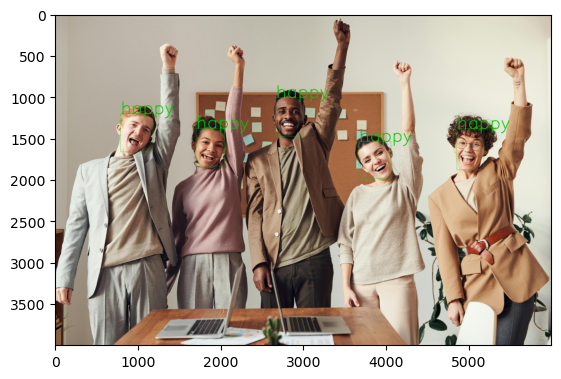

In [7]:
image = cv2.imread("data/people.jpg")

input_image = preprocess(image, input_layer_face)
results = compiled_model_face([input_image])[output_layer_face]

confidence_threshold = .95
face_boxes, scores = find_faceboxes(image, results, confidence_threshold)
show_image = draw_faceboxes(image, face_boxes, scores)

draw_emotions(face_boxes, image, show_image)

plt.imshow(cv2.cvtColor(show_image, cv2.COLOR_BGR2RGB))


In [8]:
EMOTION_NAMES = ['neutral','happy','sad','surprise','anger']
for i in range(len(face_boxes)):

        xmin, ymin, xmax, ymax = face_boxes[i]
        face = image[ymin:ymax, xmin:xmax]
        input_image = preprocess(face, input_layer_emo)
        results_emo = compiled_model_emo([input_image])[output_layer_emo]
      
        results_emo = results_emo.squeeze()
        index = np.argmax(results_emo)

        text = EMOTION_NAMES[index]
        cv2.putText(show_image, text, (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX,10, (0,200,0),2)
        print(np.round(results_emo,2)f, index, text)
        plt.imshow(cv2.cvtColor(show_image, cv2.COLOR_BGR2RGB))

SyntaxError: invalid syntax. Perhaps you forgot a comma? (2023968876.py, line 14)